In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
df = pd.read_pickle('test.pkl')

In [4]:
#df.describe().transpose()
#df.info()
#df.isna().sum()

# Party analysis

,votes,%
affiliation,,
Fidesz/KDNP,2823419,52.522003
United for Hungary,1983708,36.901472
Our Country,307064,5.712087
MKKP,126648,2.355940
MEMO,64341,1.196889
Others,39013,0.725730
Normal party,31495,0.585878


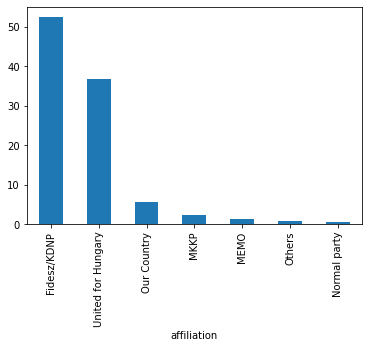

In [5]:
party = df.groupby('affiliation').sum().drop(columns = 'relative')
party['%'] = party['votes'].apply(lambda x : (x/party['votes'].sum())*100)
party = party.sort_values(by='%', ascending = False)
party['%'].plot(kind='bar')
party

In [6]:
fidesz = {'mail' : 251468, 'name' : 'Fidesz', 'total' : 3060706, 'constituency' : 2823419}
united_for_hungary = {'mail' : 11034, 'name' : 'United for Hungary','total' : 1947331, 'constituency' : 1983708}
Our_country = {'mail' : 2836, 'name' :'Our Homeland', 'total' : 332487, 'constituency' : 307064}

parties = pd.DataFrame([fidesz, united_for_hungary, Our_country])
parties['diff'] = parties['total'] - parties['constituency']
parties.index = parties['name']
parties

,mail,name,total,constituency,diff
name,,,,,
Fidesz,251468,Fidesz,3060706,2823419,237287
United for Hungary,11034,United for Hungary,1947331,1983708,-36377
Our Homeland,2836,Our Homeland,332487,307064,25423


Aggregation of list votes
Total number of valid votes cast for party lists
5,624,225 ( 99.46% )
Total number of valid votes cast on nationality lists
30,635 ( 0.54% )
Total number of valid votes cast for lists
5,654,860 ( 100.00% )

# Benford analysis

<AxesSubplot:xlabel='test', ylabel='count'>

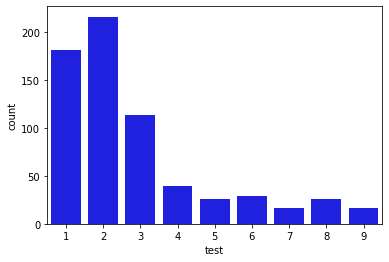

In [7]:
import seaborn as sns
df = df[df['votes'] != 0]
df['test'] = df.votes.apply(lambda x : int(str(x)[0]))
#df = df[df['test'] != 0]
#df['test'].value_counts().plot(kind ='bar')
sns.countplot(data=df, x = 'test', color = 'b')

In [8]:
# create Benford test dataframe

ben = df.groupby('test').count()
Benford_digits = [30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6]

ben['Benford distribution'] = Benford_digits
ben = ben.drop(columns = ['name', 'relative', 'district'])
ben['Hungarian election'] = ben['votes']/sum(ben['votes'])*100
ben['test'] = ben.index

#perform Chi-Square Goodness of Fit Test
stats.chisquare(f_obs=ben['Hungarian election'].array, f_exp=ben['Benford distribution'].array)

Power_divergenceResult(statistic=22.091396760820214, pvalue=0.00474933911389331)

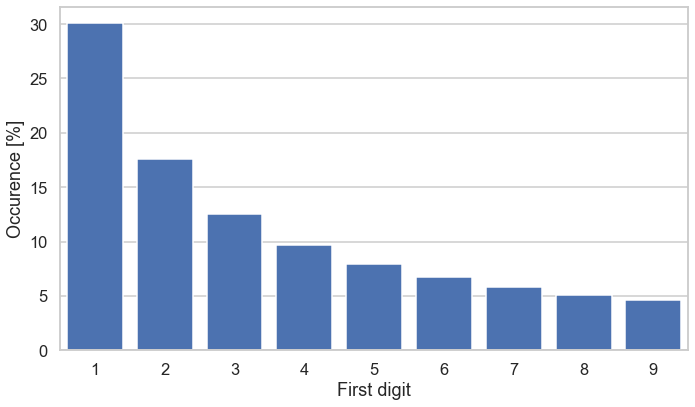

In [66]:
colors = ['b']
fig, ax = plt.subplots(figsize=(10,6))
#sns.set_theme(style="whitegrid", context="talk")
sns.barplot(data=ben, y = 'Benford distribution', x ='test', saturation =1, palette=sns.color_palette(colors) )
#ben['Benford distribution'].plot(kind='bar', alpha = 0.9)
#(ben['Hungarian election']).plot(kind='bar', color = 'r', alpha = 0.3)
plt.xlabel('First digit')
plt.ylabel('Occurence [%]')
plt.tight_layout()
plt.savefig('Benfords Distribution')

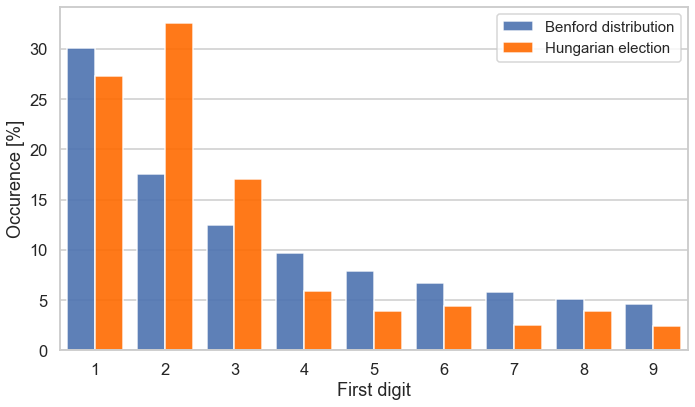

In [50]:
colors = ["b", "#FF6A00"]

fig, ax = plt.subplots(figsize=(10,6))
sns.set_theme(style="whitegrid", context="talk")
lol = pd.melt(ben, id_vars=['test'], value_vars=['Benford distribution', 'Hungarian election' ])
lol.rename(columns={'variable' : ' '}, inplace =True)
sns.barplot(data=lol, y = 'value', x='test', hue =' ', alpha = 0.9, palette=sns.color_palette(colors), saturation =1 )
plt.xlabel('First digit')
plt.ylabel('Occurence [%]')

# Set your custom color palette
plt.legend(bbox_to_anchor=(.98, 0.98), loc=1, borderaxespad=0. , fontsize =10)
plt.legend(fontsize = 15)
plt.tight_layout()
plt.savefig('Hungarian electon')

In [10]:
lol

,test,,value
0,1,Benford distribution,30.100000
1,2,Benford distribution,17.600000
2,3,Benford distribution,12.500000
3,4,Benford distribution,9.700000
4,5,Benford distribution,7.900000
5,6,Benford distribution,6.700000
6,7,Benford distribution,5.800000
7,8,Benford distribution,5.100000
8,9,Benford distribution,4.600000
9,1,Hungarian election,27.300151


In [11]:
lol.columns

Index(['test', ' ', 'value'], dtype='object')

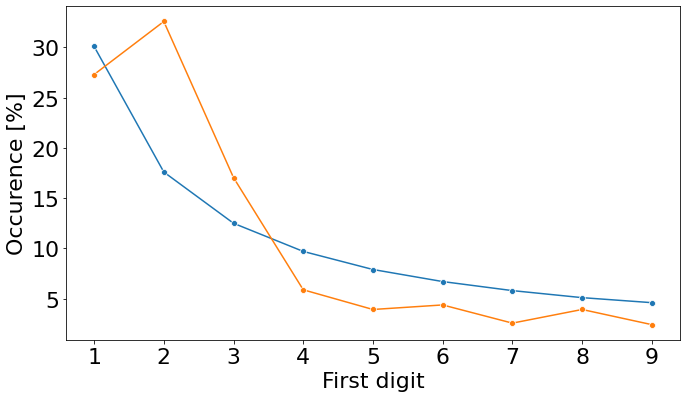

In [12]:
fig2, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=lol, y = 'value', x='test', hue =' ', marker ='o', legend = False)
plt.xlabel('First digit')
plt.ylabel('Occurence [%]')
font = {'weight' : 'normal',
        'size'   : 22}

plt.rc('font', **font)
#plt.legend(bbox_to_anchor=(0.98, 0.98), loc=0, borderaxespad=0. , fontsize =10)
plt.tight_layout()

<AxesSubplot:xlabel='test'>

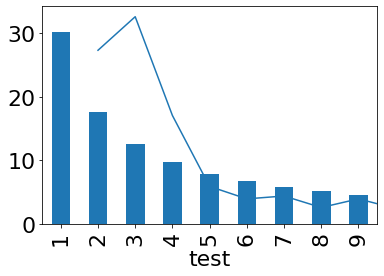

In [15]:
ben['Hungarian election'].plot()
ben['Benford distribution'].plot(kind = 'bar')

In [ ]:
ben

# Log test

In [16]:
import numpy as np
df['log'] = df['votes'].apply(lambda x: np.log(x))

<AxesSubplot:>

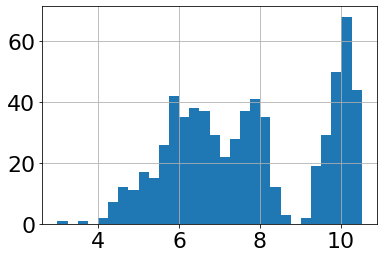

In [22]:
df['log'].hist(bins = 30)

<AxesSubplot:>

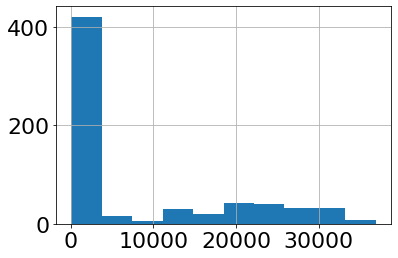

In [18]:
lal = df[df['votes']  > 100]

lal['votes'].dropna().hist()